---
## Практична робота №4.Алгоритми пошуку та їх складність
## Author - Kyrylo Klingen
---

# Мета : Опанувати основні алгоритми сортування та навчитись методам аналізу їх асимптотичної складності.

# 1 . Оцінити асимптотичну складність алгоритму лінійного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку. Як можна покращити алгоритм лінійного пошуку?

In [1]:
def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

В найгіршому випадку складність O(n).У найкращому випадку складність O(1).Алгоритм можна покращити попередньо його відсортувавши та застосувавши бінарний пошук.Також можливе використування хеш-таблиць для пришвидшення алгоритму.

# 2 . Оцінити асимптотичну складність алгоритму бінарного пошуку у 𝑂-нотації в найгіршому і в найкращому випадку.

In [ ]:
def binary_search(arr, x):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            left = mid + 1
        else:
            right = mid - 1
    return -1

В найгіршому випадку складність O(log2 n) - в цьому випадку або елемент відсутній , або він знаходиться в кінці масиву(або початку).В найкрашому випадку складність O(1) - елемент находиться в середині масиву

# 3 . Побудувати алгоритм тернарного пошуку і оцінити його асимптотичну складність алгоритму у 𝑂-нотації в найгіршому і в найкращому випадку. Який з алгоритмів є оптимальнішим: бінарний, чи тернарний? Обґрунтувати відповідь відповідними обчисленнями.


In [ ]:
def ternary_search(arr, x):
    left, right = 0, len(arr) - 1
    while left <= right:
        third = (right - left) // 3
        mid1 = left + third
        mid2 = right - third

        if arr[mid1] == x:
            return mid1
        if arr[mid2] == x:
            return mid2

        if x < arr[mid1]:
            right = mid1 - 1
        elif x > arr[mid2]:
            left = mid2 + 1
        else:
            left = mid1 + 1
            right = mid2 - 1
    return -1

В найгіршому випадку складність буде O(log3 n) - масив ділиться на 3 частини та перевіряє одначасно два елементи найгіршими випадками будуть або відсутність , або присутність у кінці(або початку).В найкращому O(1) - знову ж таки тому що знаходиться в місці розтину масиву.

Привівши до однієї основи логарифми ми можемо бачити , що 2×((log2 n)/1.58)≈1.26log2 n. Вже з цього можемо бачити що асимптотична складність тернарного алгоритму пошуку вища за бінарний пошук.Порівнявши їх асимптотичну складність можемо побачити , що бінарний алгоритм пошуку більш оптимальний для проведення пошуку.На перший погляд може здатися , що тернарний може бути вигіднишим бо має менше ітерацій розтину , але в цих ітераціях більше порівняннь.

За інформацією яку я отримав під час дослідження тернарного алгоритму пошуку я знайшов , що зазвичай його використовують для пошуку мінімумів та максимумів унімодальних функцій , тому й в нього є своє призначення де він показує кращі результати за інші алгоритми.

# 4 . Порівняти ефективність алгоритмів лінійного, бінарного та тернарного пошуку для різних розмірів вхідного списку. Для цього провести експериментальне дослідження та побудувати графіки залежності часу виконання алгоритму від розміру вхідного списку.

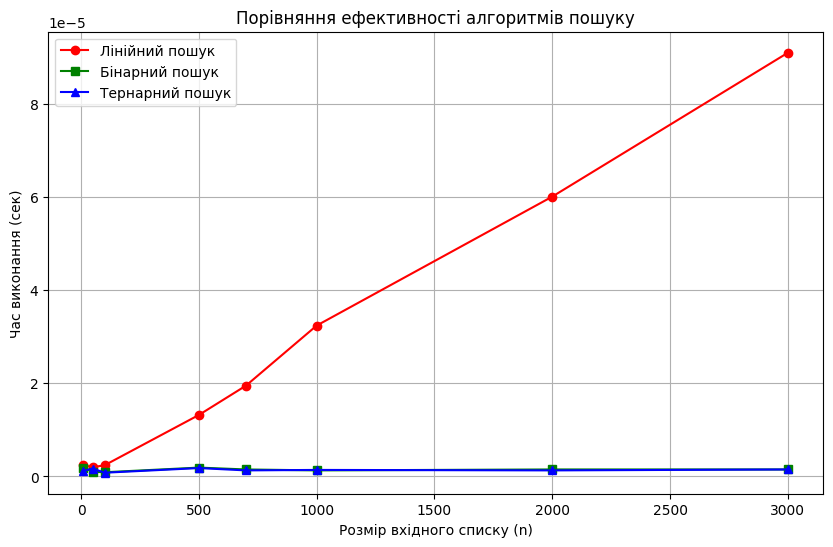

In [36]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Лінійний пошук
def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

# Бінарний пошук
def binary_search(arr, x):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Тернарний пошук
def ternary_search(arr, x):
    left, right = 0, len(arr) - 1
    while left <= right:
        third = (right - left) // 3
        mid1 = left + third
        mid2 = right - third
        if arr[mid1] == x:
            return mid1
        if arr[mid2] == x:
            return mid2
        if x < arr[mid1]:
            right = mid1 - 1
        elif x > arr[mid2]:
            left = mid2 + 1
        else:
            left = mid1 + 1
            right = mid2 - 1
    return -1

# Список розмірів
sizes = [10, 50, 100, 500, 700, 1000, 2000, 3000]
linear_times = []
binary_times = []
ternary_times = []

# Експеримент
for n in sizes:
    arr = list(range(n))
    x = n - 1  # пошук останнього елемента — гірший випадок для лінійного

    # Лінійний пошук
    start = time.perf_counter()
    linear_search(arr, x)
    linear_times.append(time.perf_counter() - start)

    # Бінарний пошук
    start = time.perf_counter()
    binary_search(arr, x)
    binary_times.append(time.perf_counter() - start)

    # Тернарний пошук
    start = time.perf_counter()
    ternary_search(arr, x)
    ternary_times.append(time.perf_counter() - start)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(sizes, linear_times, label="Лінійний пошук", marker='o', color='red')
plt.plot(sizes, binary_times, label="Бінарний пошук", marker='s', color='green')
plt.plot(sizes, ternary_times, label="Тернарний пошук", marker='^', color='blue')
plt.xlabel("Розмір вхідного списку (n)")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння ефективності алгоритмів пошуку")
plt.legend()
plt.grid(True)
plt.show()


Ми бачимо , що бінарний та тернарний пошук набагато швидше за лінійний пошук.Лінійний пошук може дати хоч трохи схожий результат лише на дуже малих n.

# 5 . Порівняти алгоритми пошуку за їхньою здатністю працювати з відсортованими та не відсортованими списками. Провести аналіз впливу відсортованості списку на час виконання кожного алгоритму.


Алгоритм лінійного пошуку може працювати як з відсортованими списками так і з не відсортованими , але його асимптотична складність O(n) , тому він доволі повільний.В той час як алгоритми бінарного та тернарного пошуку можуть працювати лише з відсортованими списками , але їх асимптотична складнсть O(log n)- в середньому.

Для аналізу впливу відсортованості списку на час виконання побудуємо графік.

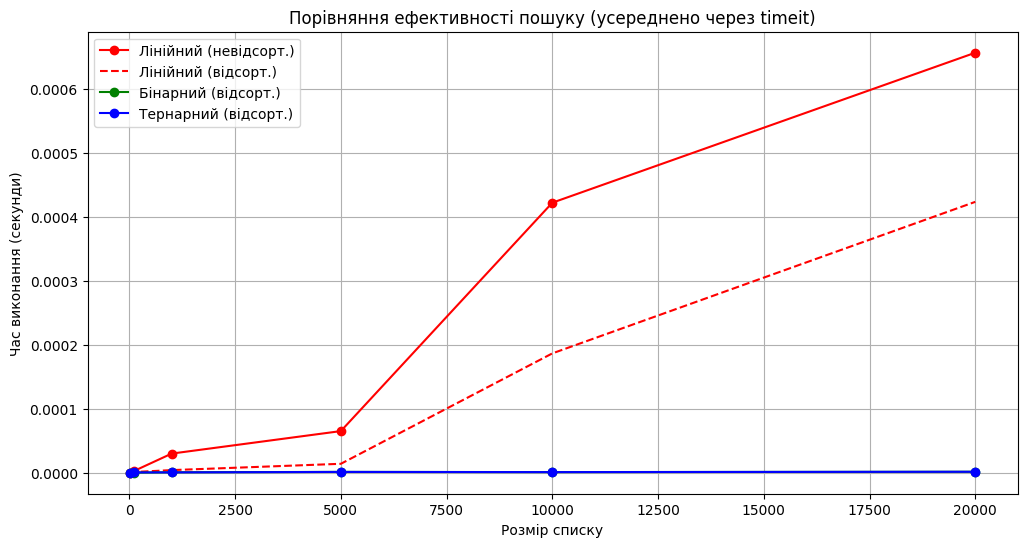

In [79]:
import random
import timeit
import matplotlib.pyplot as plt

# ---- Алгоритми пошуку ----

def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

def binary_search(arr, x):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def ternary_search(arr, x):
    left, right = 0, len(arr) - 1
    while left <= right:
        third = (right - left) // 3
        mid1 = left + third
        mid2 = right - third
        if arr[mid1] == x:
            return mid1
        if arr[mid2] == x:
            return mid2
        if x < arr[mid1]:
            right = mid1 - 1
        elif x > arr[mid2]:
            left = mid2 + 1
        else:
            left = mid1 + 1
            right = mid2 - 1
    return -1

# ---- Функція-обгортка для timeit ----
def time_function(func, arr, x, number=10):
    return timeit.timeit(lambda: func(arr, x), number=number) / number

# ---- Розміри та результати ----
sizes = [10, 100, 1000, 5000, 10000, 20000]
lin_unsorted_times = []
lin_sorted_times = []
bin_sorted_times = []
ter_sorted_times = []

for size in sizes:
    unsorted_list = [random.randint(0, size) for _ in range(size)]
    sorted_list = sorted(unsorted_list)
    target = unsorted_list[-1]  # Найгірший випадок

    lin_unsorted_times.append(time_function(linear_search, unsorted_list, target))
    lin_sorted_times.append(time_function(linear_search, sorted_list, target))
    bin_sorted_times.append(time_function(binary_search, sorted_list, target))
    ter_sorted_times.append(time_function(ternary_search, sorted_list, target))

# ---- Побудова графіку ----
plt.figure(figsize=(12, 6))
plt.plot(sizes, lin_unsorted_times, 'r-o', label='Лінійний (невідсорт.)')
plt.plot(sizes, lin_sorted_times, 'r--', label='Лінійний (відсорт.)')
plt.plot(sizes, bin_sorted_times, 'g-o', label='Бінарний (відсорт.)')
plt.plot(sizes, ter_sorted_times, 'b-o', label='Тернарний (відсорт.)')
plt.xlabel('Розмір списку')
plt.ylabel('Час виконання (секунди)')
plt.title('Порівняння ефективності пошуку (усереднено через timeit)')
plt.legend()
plt.grid(True)
plt.show()


Відсортований лінійний алгоритм в середньому швидше працює за свою невідсортовану версію , але все ще повільніше за бінарний та тернарний пошук.

# 6 . Розглянути сценарії використання кожного з алгоритмів пошуку у практичних задачах і обґрунтувати вибір кожного алгоритму в конкретному випадку.

# 6.1 . Лінійний пошук.

Як ми пам'ятаємо лінійний пошук не потребує сортування списку та погано працює з великими об'ємами даних , тому з цього маємо , що якщо якесь завдання не потребує сортування та потрібно опрацювати невелику кількість даних то лінійний пошук підійде добре.Як приклад можна взяти список тих хто брав книжку в бібліотеці , не має потреби його сортувати тому що тоді затратиться ще більше часі ніж просто пройтись по кожному імені та фамілії.

# 6.2 . Бінарний пошук.

Цей пошук використовується лише в відсортованих списках , доцільним відстортовувати список для викорстання цього пошуку буде лише тоді , коли даних дуже багато.Як приклад можемо взять пошук слова у словнику , він відсортований за першою буквою слова та самих слів там дуже багато.

# 6.3 . Тернарний пошук.

Дуже схожий на бінарний пошук , але трохи повільніший.Це не заважає йому мати власну область застосування , як вже я раніше писав він є дуже корисним при аналізі мінімумів та максимумів унімодальних функцій , це ми й візьмемо за приклад для застосування.Тут тернарний пошук оптимізує пошук в неіндексованій області.

# 7 . Контрольні питання.

* Що таке алгоритм пошуку і чому він важливий у контексті комп'ютерних наук - алгоритм пошуку використовують для пошуку певного елемента ( або його індекса ) у певному списку.Для комп'ютерний наук він є важливим тому що він часто є основою для складніших алгоритмів , а також часто використовуються для вирішення певних задач (деякі з них описані у самому пз).

* Які основні критерії оцінки ефективності алгоритмів пошуку? - асимптотична складність , оптимальність , складність реалізації , умови застосування.
  
* Що таке лінійний пошук, і як він працює? - Лінійний пошук це один з алгортимів пошуку який можна використовувати як у відсортованому списку так і не відсортованому списку.Лінійний пошук послідовно переглядає кожен елемент зі списку та порівнює з шуканим значенням до тих пір поки не знайде шукане значення або не дійде до кінця.

* Які умови повинні бути виконані для успішного застосування бінарного пошуку? - основною умовою є те , що список повинен бути попередньо відсортованим.


* Які переваги та недоліки використання бінарного пошуку порівняно з іншими алгоритмами пошуку? - Переваги : Швидкість (O(log n)) та те , що він гарно працює з великою кількістю даних.Недоліки : потрібно попередньо сортувати список , більш складна реалізація , якщо мала кількість даних доречніше буде використати інший алгоритм пошуку.

* Що таке тернарний пошук, і в чому його відмінність від бінарного пошуку - Тернайрний пошук це один з алгоритмів пошуку , який потребує щоб список було попередньо відсортовано , зазвичай використовується для пошук мінімумів та максимумів унімодальних функцій.Головна відмінність від бінарного пошуку полягає в тому , що замість розбиття списку на 2 частини , тернарний пошук розбиває його на 3 та порівнює одночасно 2 елементи замість 1.

# 8 . Висновок

На практичному занятті ми опанували основні алгоритми сортування та навчились методам аналізу їх асимптотичної складності.
